In [2]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Loading the data
data0 = pd.read_csv('Datafiles/5.urldata.csv')
data0.head()

Domain  Have_IP  Have_At  URL_Length  URL_Depth  Redirection  \
0  graphicriver.net        0        0           1          1            0   
1         ecnavi.jp        0        0           1          1            1   
2      hubpages.com        0        0           1          1            0   
3   extratorrent.cc        0        0           1          3            0   
4     icicibank.com        0        0           1          3            0   

   https_Domain  TinyURL  Prefix/Suffix  iFrame  Mouse_Over  Right_Click  \
0             0        0              0       0           0            1   
1             0        0              0       0           0            1   
2             0        0              0       0           0            1   
3             0        0              0       0           0            1   
4             0        0              0       0           0            1   

   Web_Forwards  Label  
0             0      0  
1             0      0  
2             0      0  
3             0      0  
4             0      0

In [4]:
#Checking the shape of the dataset
data0.shape

(10000, 14)

In [5]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'iFrame',
       'Mouse_Over', 'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   iFrame         10000 non-null  int64 
 10  Mouse_Over     10000 non-null  int64 
 11  Right_Click    10000 non-null  int64 
 12  Web_Forwards   10000 non-null  int64 
 13  Label          10000 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


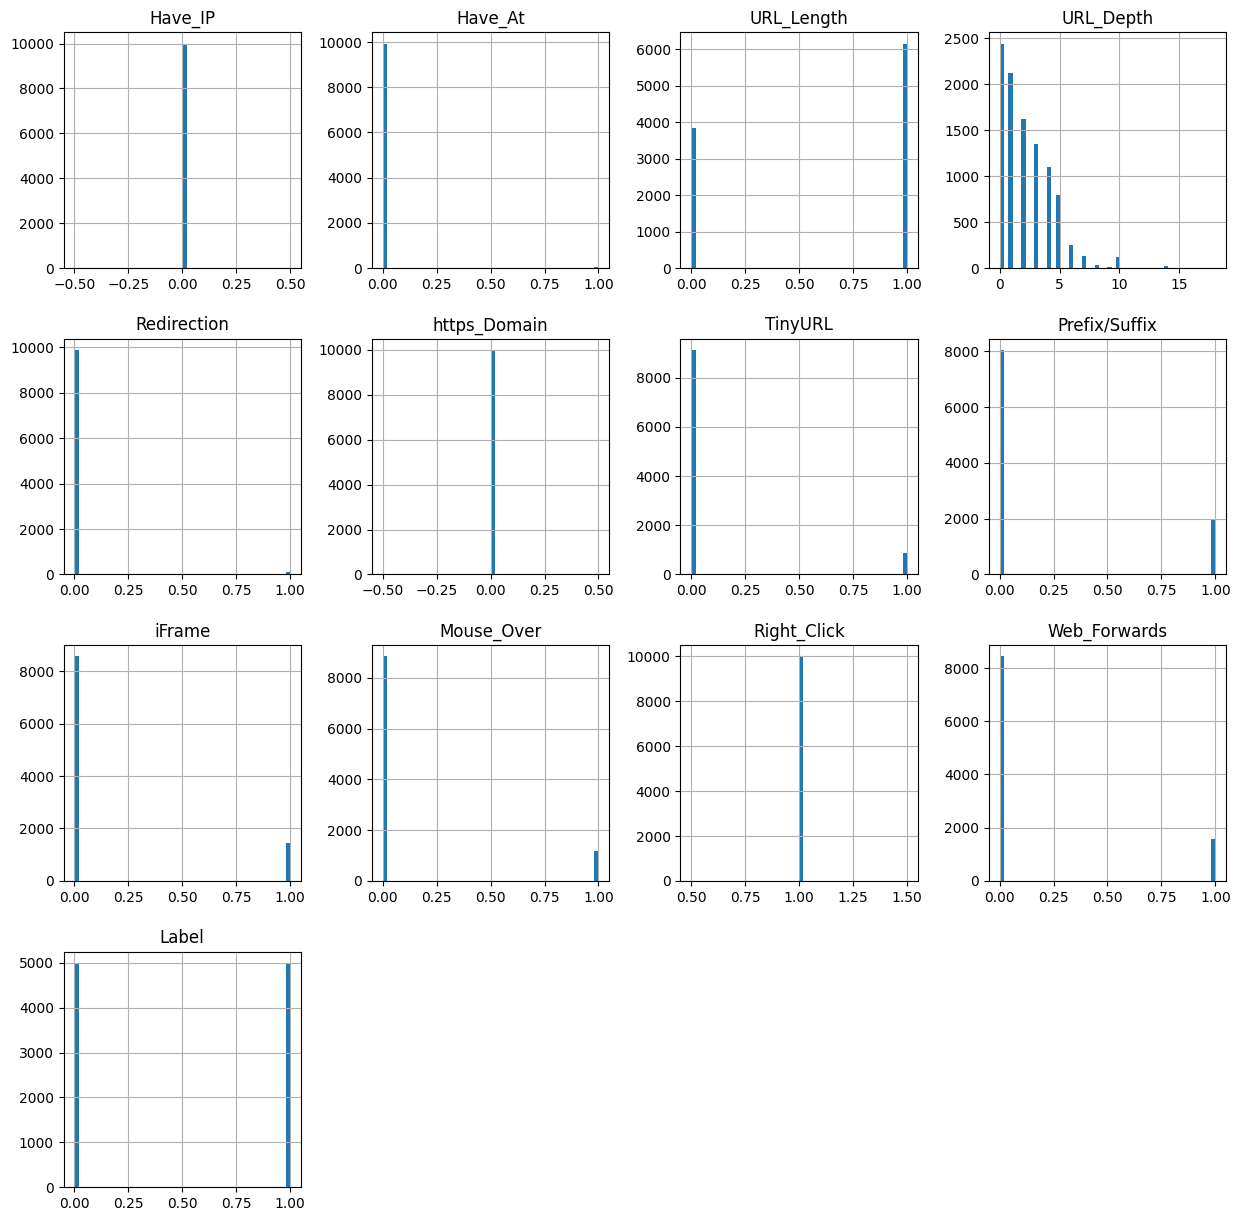

In [7]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [8]:
data0.describe()

Have_IP       Have_At    URL_Length     URL_Depth   Redirection  \
count  10000.0  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.0      0.006100      0.615900      2.209500      0.011100   
std        0.0      0.077868      0.486406      2.106099      0.104775   
min        0.0      0.000000      0.000000      0.000000      0.000000   
25%        0.0      0.000000      0.000000      1.000000      0.000000   
50%        0.0      0.000000      1.000000      2.000000      0.000000   
75%        0.0      0.000000      1.000000      3.000000      0.000000   
max        0.0      1.000000      1.000000     18.000000      1.000000   

       https_Domain      TinyURL  Prefix/Suffix        iFrame    Mouse_Over  \
count       10000.0  10000.00000   10000.000000  10000.000000  10000.000000   
mean            0.0      0.08750       0.194700      0.143700      0.115800   
std             0.0      0.28258       0.395989      0.350803      0.320001   
min             0.0      0.00000       0.000000      0.000000      0.000000   
25%             0.0      0.00000       0.000000      0.000000      0.000000   
50%             0.0      0.00000       0.000000      0.000000      0.000000   
75%             0.0      0.00000       0.000000      0.000000      0.000000   
max             0.0      1.00000       1.000000      1.000000      1.000000   

       Right_Click  Web_Forwards         Label  
count      10000.0  10000.000000  10000.000000  
mean           1.0      0.156200      0.500000  
std            0.0      0.363063      0.500025  
min            1.0      0.000000      0.000000  
25%            1.0      0.000000      0.000000  
50%            1.0      0.000000      0.500000  
75%            1.0      0.000000      1.000000  
max            1.0      1.000000      1.000000

In [9]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [10]:
#data = data.drop(['Web_Traffic'], axis = 1).copy()

In [10]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

Have_IP  Have_At  URL_Length  URL_Depth  Redirection  https_Domain  \
0        0        0           1          2            0             0   
1        0        0           0          1            0             0   
2        0        0           0          0            0             0   
3        0        0           1          2            0             0   
4        0        0           1          1            0             0   

   TinyURL  Prefix/Suffix  iFrame  Mouse_Over  Right_Click  Web_Forwards  \
0        0              0       0           0            1             0   
1        1              0       0           0            1             0   
2        0              1       1           1            1             1   
3        0              0       0           0            1             0   
4        0              1       0           0            1             0   

   Label  
0      0  
1      1  
2      1  
3      1  
4      1

In [12]:
# Sepratating & assigning features and target columns to X & y
Y = data['Label']
X = data.drop('Label',axis=1)
X.shape, Y.shape

((10000, 12), (10000,))

In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Have_IP        10000 non-null  int64
 1   Have_At        10000 non-null  int64
 2   URL_Length     10000 non-null  int64
 3   URL_Depth      10000 non-null  int64
 4   Redirection    10000 non-null  int64
 5   https_Domain   10000 non-null  int64
 6   TinyURL        10000 non-null  int64
 7   Prefix/Suffix  10000 non-null  int64
 8   iFrame         10000 non-null  int64
 9   Mouse_Over     10000 non-null  int64
 10  Right_Click    10000 non-null  int64
 11  Web_Forwards   10000 non-null  int64
dtypes: int64(12)
memory usage: 937.6 KB


In [14]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Label
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [15]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 12), (2000, 12))

In [16]:
#importing packages
from sklearn.metrics import accuracy_score

### Tuning

In [17]:
## Hyperparameter Optimization
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [19]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7],
    "colsample_bylevel":[0.3,0.4,0.5,0.7,0.9],
    "n_estimators":[4,6,8,9,11,13]
}

In [18]:
from datetime import datetime

In [21]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('\nTime taken: %i hours %i minutes and %s seconds.'%(thour,tmin,round(tsec,2)))

In [19]:
classifier=xgboost.XGBClassifier()

In [23]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=15,scoring='roc_auc',n_jobs=-1,cv=5,verbose=10)

In [25]:
start_time=timer(None)
random_search.fit(X_train,Y_train)
timer(start_time)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[CV 3/5; 1/15] START colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=11
[CV 3/5; 1/15] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=11;, score=0.963 total time=   0.1s
[CV 2/5; 1/15] START colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=11
[CV 5/5; 1/15] START colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=11
[CV 2/5; 4/15] START colsample_bylevel=0.4, colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=13
[CV 2/5; 1/15] END colsample_bylevel=0.5, colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=11;, score=0.972 total time=   0.2s
[CV 5/5; 1/15] END colsample_bylevel=0.5, colsample_bytree=0.5

In [26]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=11, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [27]:
random_search.best_params_

{'n_estimators': 11,
 'min_child_weight': 7,
 'max_depth': 10,
 'learning_rate': 0.3,
 'gamma': 0.0,
 'colsample_bytree': 0.5,
 'colsample_bylevel': 0.5}

In [ ]:
model=xgboost.XGBClassifier(max_depth=10,min_child_weight=7,learning_rate=0.3,gamma=0.0,colsample_bytree=0.5,colsample_bylevel=0.5,n_estimators=11)

In [20]:
from sklearn.model_selection import cross_val_score


In [ ]:
score=cross_val_score(model,X_train,Y_train,cv=10)
score

In [30]:
score.mean()

np.float64(0.9129999999999999)

In [ ]:
#fit the model
model.fit(X_train, Y_train)

#predicting the target value from the model for the samples
Y_test_xgb = model.predict(X_test)
Y_train_xgb = model.predict(X_train)

In [32]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(Y_train,Y_train_xgb)
acc_test_xgb = accuracy_score(Y_test,Y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.915
XGBoost : Accuracy on test Data: 0.913


### Grid Search

In [33]:

from sklearn.model_selection import GridSearchCV


In [ ]:
parameters1={
    "learning_rate":[0.05,0.20,0.30],
    "max_depth":[3,6,9,13],
    "min_child_weight":[1,4,7],
    "gamma":[0.0,0.3],
    "colsample_bytree":[0.3,0.6],
    "colsample_bylevel":[0.3,0.7],
    "n_estimators":[4,8,11,15]
}

In [ ]:
Grid_search=GridSearchCV(classifier,param_grid=parameters1,scoring='roc_auc',n_jobs=-1,cv=5,verbose=10)

In [36]:
start_time=timer(None)
Grid_search.fit(X_train,Y_train)
timer(start_time)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits
[CV 1/5; 1/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=4
[CV 2/5; 1/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=4
[CV 3/5; 1/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=4
[CV 4/5; 1/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=4
[CV 5/5; 1/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=4
[CV 1/5; 1/1152] END colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=4;, score=0.684 total time=   0.1s
[CV 2/5; 1/1152] END c

[CV 4/5; 2/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=8
[CV 1/5; 2/1152] END colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=8;, score=0.883 total time=   0.1s
[CV 2/5; 2/1152] END colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=8;, score=0.909 total time=   0.1s
[CV 5/5; 2/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=8
[CV 1/5; 3/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=11
[CV 2/5; 3/1152] START colsample_bylevel=0.3, colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=11
[CV 3/5; 3/1152] START colsample_bylevel=0.3, colsampl

In [37]:
Grid_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=15, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
Grid_search.best_params_

{'colsample_bylevel': 0.7,
 'colsample_bytree': 0.6,
 'gamma': 0.3,
 'learning_rate': 0.3,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 15}

In [ ]:
model1=xgboost.XGBClassifier(max_depth=6,min_child_weight=1,learning_rate=0.3,gamma=0.3,colsample_bytree=0.6,colsample_bylevel=0.7,n_estimators=15)

In [ ]:
score=cross_val_score(model1,X_train,Y_train,cv=10)
score

array([0.905  , 0.93375, 0.93875, 0.9375 , 0.92125, 0.93125, 0.92625,
       0.90875, 0.92625, 0.925  ])

In [42]:
score.mean()

np.float64(0.9253750000000001)

In [ ]:
#fit the model
model1.fit(X_train, Y_train)

#predicting the target value from the model for the samples
y_test_xgb = model1.predict(X_test)
y_train_xgb = model1.predict(X_train)

In [44]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(Y_train,y_train_xgb)
acc_test_xgb = accuracy_score(Y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.930
XGBoost : Accuracy on test Data: 0.924


### 2nd round Grid

In [ ]:
parameters2={
    "learning_rate":[0.28,0.30,0.32],
    "max_depth":[4,5,6,7,8],
    "min_child_weight":[1,2,3],
    "gamma":[0.3,0.4,0.5],
    "colsample_bytree":[0.45,0.6,0.8],
    "colsample_bylevel":[0.55,0.7,0.85],
    "n_estimators":[13,15,17]
}

In [ ]:
Grid_search2=GridSearchCV(classifier,param_grid=parameters2,scoring='roc_auc',n_jobs=-1,cv=5,verbose=10)

In [47]:
start_time=timer(None)
Grid_search2.fit(X_train,Y_train)
timer(start_time)

Fitting 5 folds for each of 3645 candidates, totalling 18225 fits
[CV 1/5; 1/3645] START colsample_bylevel=0.55, colsample_bytree=0.45, gamma=0.3, learning_rate=0.28, max_depth=4, min_child_weight=1, n_estimators=13
[CV 2/5; 1/3645] START colsample_bylevel=0.55, colsample_bytree=0.45, gamma=0.3, learning_rate=0.28, max_depth=4, min_child_weight=1, n_estimators=13
[CV 3/5; 1/3645] START colsample_bylevel=0.55, colsample_bytree=0.45, gamma=0.3, learning_rate=0.28, max_depth=4, min_child_weight=1, n_estimators=13
[CV 4/5; 1/3645] START colsample_bylevel=0.55, colsample_bytree=0.45, gamma=0.3, learning_rate=0.28, max_depth=4, min_child_weight=1, n_estimators=13
[CV 5/5; 1/3645] START colsample_bylevel=0.55, colsample_bytree=0.45, gamma=0.3, learning_rate=0.28, max_depth=4, min_child_weight=1, n_estimators=13
[CV 1/5; 2/3645] START colsample_bylevel=0.55, colsample_bytree=0.45, gamma=0.3, learning_rate=0.28, max_depth=4, min_child_weight=1, n_estimators=15
[CV 2/5; 2/3645] START colsample_b

In [48]:
Grid_search2.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.85, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.32, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=17, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
Grid_search2.best_params_

{'colsample_bylevel': 0.85,
 'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.32,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 17}

In [50]:
model2=xgboost.XGBClassifier(max_depth=7,min_child_weight=1,learning_rate=0.32,gamma=0.5,colsample_bytree=0.8,colsample_bylevel=0.85,n_estimators=17)

In [51]:
score=cross_val_score(model2,X_train,Y_train,cv=10)
score

array([0.925  , 0.93   , 0.94   , 0.94125, 0.9175 , 0.9325 , 0.93   ,
       0.9225 , 0.92875, 0.92375])

In [52]:
score.mean()

np.float64(0.929125)

In [53]:
#fit the model
model2.fit(X_train, Y_train)

#predicting the target value from the model for the samples
y_test_xgb = model2.predict(X_test)
y_train_xgb = model2.predict(X_train)

In [54]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(Y_train,y_train_xgb)
acc_test_xgb = accuracy_score(Y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.932
XGBoost : Accuracy on test Data: 0.925


### 3rd Round

In [21]:
parameters3={
    "learning_rate":[0.32,0.38,0.5],
    "max_depth":[7],
    "min_child_weight":[1],
    "gamma":[0.5,0.65,0.8],
    "colsample_bytree":[0.8,0.9,1.00],
    "colsample_bylevel":[0.85,0.95,1.00],
    "n_estimators":[17,19,21]
}

In [22]:
Grid_search3=GridSearchCV(classifier,param_grid=parameters3,scoring='roc_auc',n_jobs=-1,cv=5,verbose=10)

NameError: name 'GridSearchCV' is not defined

In [62]:
start_time=timer(None)
Grid_search3.fit(X_train,Y_train)
timer(start_time)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5; 1/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17
[CV 2/5; 1/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17
[CV 3/5; 1/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17
[CV 4/5; 1/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17
[CV 5/5; 1/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17
[CV 1/5; 1/243] END colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17;, score=0.972 total time=   0.1s
[CV 1/5; 2/243] S

[CV 3/5; 2/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=19
[CV 4/5; 2/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=19
[CV 5/5; 1/243] END colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17;, score=0.974 total time=   0.1s
[CV 4/5; 1/243] END colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=17;, score=0.977 total time=   0.1s
[CV 5/5; 2/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=19
[CV 1/5; 3/243] START colsample_bylevel=0.85, colsample_bytree=0.8, gamma=0.5, learning_rate=0.32, max_depth=7, min_child_weight=1, n_estimators=21
[CV 2/5; 3/243] START colsample_bylevel=0.85, cols

In [63]:
Grid_search3.best_params_

{'colsample_bylevel': 0.85,
 'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.32,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 17}

In [23]:
model3=xgboost.XGBClassifier(max_depth=9,min_child_weight=1,learning_rate=0.55,gamma=0.0,colsample_bytree=0.9,colsample_bylevel=0.95,n_estimators=15)

In [24]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model3,X_train,Y_train,cv=10)
score

array([0.93125, 0.92125, 0.93625, 0.93375, 0.92375, 0.93   , 0.93625,
       0.91125, 0.9275 , 0.945  ])

In [25]:
score.mean()

np.float64(0.929625)

In [26]:
#fit the model
model3.fit(X_train, Y_train)

#predicting the target value from the model for the samples
y_test_xgb = model3.predict(X_test)
y_train_xgb = model3.predict(X_train)

In [40]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(Y_train,y_train_xgb)
acc_test_xgb = accuracy_score(Y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.930
XGBoost : Accuracy on test Data: 0.929


### Result

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [29]:
cm = confusion_matrix(Y_test, y_test_xgb)
print(cm)

[[923  62]
 [ 77 938]]


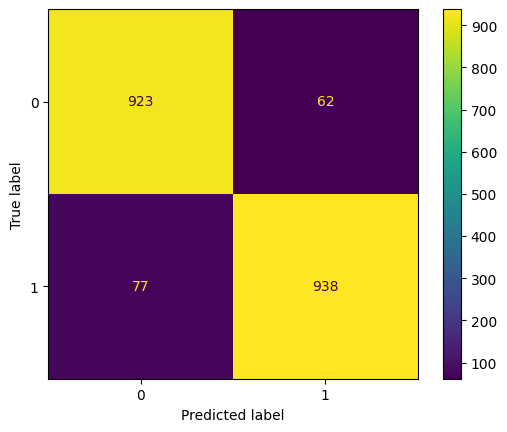

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.savefig('result.png', dpi=300, bbox_inches='tight')
plt.show()

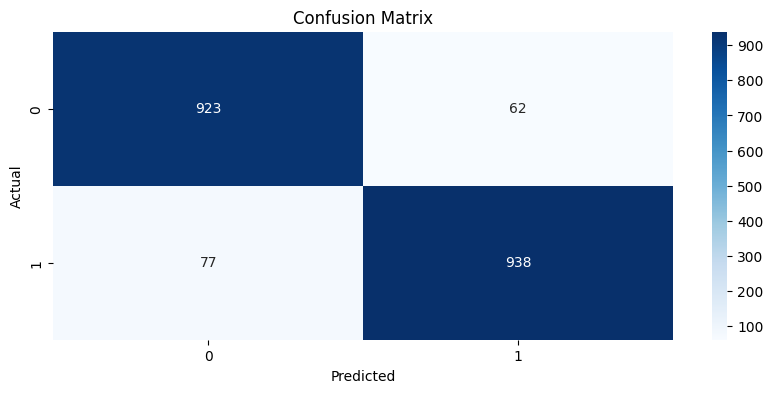

In [33]:
plt.figure(figsize=(10, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('result2.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have true labels (y_true) and predicted labels (y_pred)
# These could be lists, numpy arrays, or pandas Series

y_true = Y_test
y_pred = y_test_xgb
# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate Precision
precision = precision_score(y_true, y_pred)
print(f"Precision: {precision}")

# Calculate Recall
recall = recall_score(y_true, y_pred)
print(f"Recall: {recall}")

# Calculate F1-score
f1 = f1_score(y_true, y_pred)
print(f"F1-score: {f1}")

Accuracy: 0.9305
Precision: 0.938
Recall: 0.9241379310344827
F1-score: 0.9310173697270472


In [45]:
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [0.93, 0.93, 0.92, 0.93]
}
df = pd.DataFrame(data)

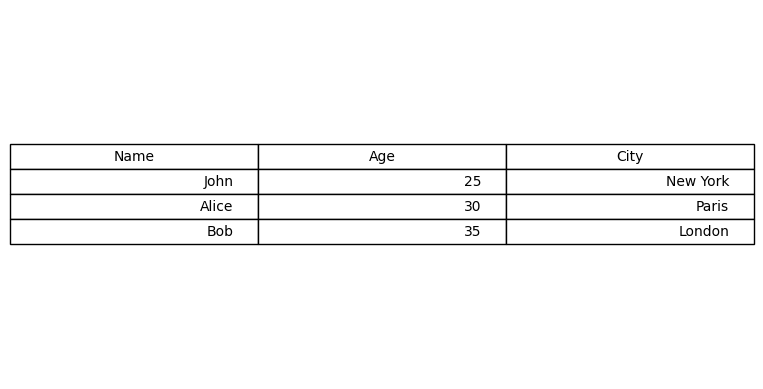

In [44]:
fig, ax = plt.subplots()
ax.axis('off')  # Turn off axis lines and ticks
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Adjust table size
plt.show()

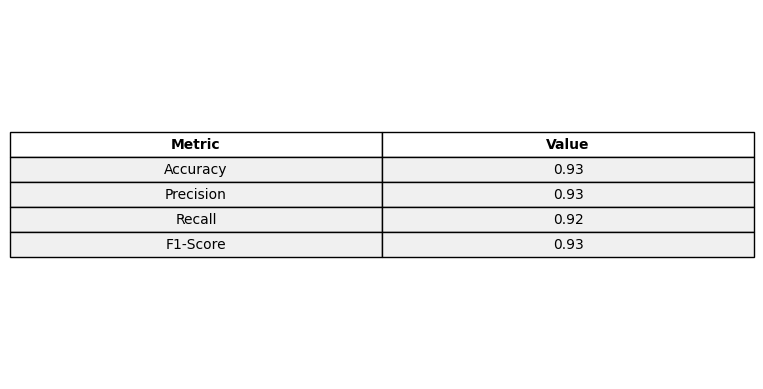

<Figure size 640x480 with 0 Axes>

In [49]:
fig, ax = plt.subplots()
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)

for (row, col), cell in table.get_celld().items():
    if (row == 0) or (col == -1):
        cell.set_text_props(fontproperties=dict(weight='bold'))
    if row > 0:
        cell.set_facecolor('#f0f0f0')

plt.show()
plt.savefig('matrix.png', bbox_inches='tight')

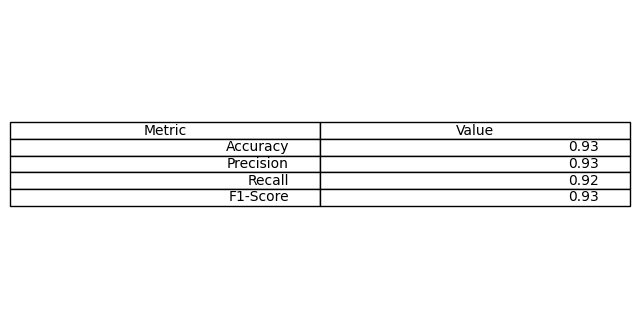

In [48]:
#    import matplotlib.pyplot as plt
#    import pandas as pd

#    # Sample DataFrame
#    data = {'Name': ['John', 'Alice', 'Bob'],
#            'Age': [25, 30, 35],
#            'City': ['New York', 'Paris', 'London']}
#    df = pd.DataFrame(data)

   # Create a table plot
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('off')  # Hide axes
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

   # Save the plot as a PNG image
plt.savefig('table_plot.png', bbox_inches='tight')

### Prediction

In [41]:
import import_ipynb
from Extraction import featureExtraction

In [42]:
def convert_inp(url):
    features=[]
    # features.append(featureExtraction(rl,1))
    features=featureExtraction(url)
    #converting the list to dataframe
    feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix',
                        'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']

    # Create an empty DataFrame with columns
    df = pd.DataFrame(columns=feature_names)

    # Inserting the Input url features into Dataframe
    df.loc[len(df)] = features

    # Deleting the Domain Column
    df=df.drop('Domain',axis=1)
    return df

In [43]:
def predict(df):
    prediction = model3.predict(df)
    if prediction==0:
        return 'legitimate'
    return 'phishing'

In [ ]:
url1='https://platform.openai.com/settings/organization/api-keys'               # legitimate website
url2='jhomitevd2abj3fk.tor2web.org/'                                            # Phishing website

In [46]:
#url=input("Enter a URL: ")
predict(convert_inp(url1))

'legitimate'